In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
from google.colab import drive #to import google drive data

In [4]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [5]:
cd /content/drive/"My Drive/Colab Notebooks/Assignment_6"

/content/drive/My Drive/Colab Notebooks/Assignment_6


In [6]:
dataset=pd.read_csv("Train.csv")
print(dataset)
dataset.info()

          ID  Gender Ever_Married  ...  Family_Size  Var_1 Segmentation
0     462809    Male           No  ...          4.0  Cat_4            D
1     462643  Female          Yes  ...          3.0  Cat_4            A
2     466315  Female          Yes  ...          1.0  Cat_6            B
3     461735    Male          Yes  ...          2.0  Cat_6            B
4     462669  Female          Yes  ...          6.0  Cat_6            A
...      ...     ...          ...  ...          ...    ...          ...
8063  464018    Male           No  ...          7.0  Cat_1            D
8064  464685    Male           No  ...          4.0  Cat_4            D
8065  465406  Female           No  ...          1.0  Cat_6            D
8066  467299  Female           No  ...          4.0  Cat_6            B
8067  461879    Male          Yes  ...          3.0  Cat_4            B

[8068 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 # 

In [7]:
dataset.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [8]:
dataset.shape

(8068, 11)

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.shape

(6665, 11)

In [11]:
dataset.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [12]:
replace = {'Gender': {'Male': 1, 'Female': 2}}
dataset.replace(replace, inplace=True)

In [13]:
replace = {'Ever_Married': {'Yes': 1, 'No': 2}}
dataset.replace(replace, inplace=True)

In [14]:
replace = {'Graduated': {'Yes': 1, 'No': 2}}
dataset.replace(replace, inplace=True)

In [15]:
replace = {'Profession': {'Artist': 1, 'Healthcare': 2,'Entertainment': 3,'Doctor': 4, 'Engineer': 5,'Lawyer': 6,'Executive': 7, 'Marketing': 8,'Homemaker': 9}}
dataset.replace(replace, inplace=True)

In [16]:
replace = {'Spending_Score': {'Low': 1, 'Average': 2, 'High': 3}}
dataset.replace(replace, inplace=True)

In [17]:
replace = {'Var_1': {'Cat_1': 1, 'Cat_2': 2,'Cat_3': 3,'Cat_4': 4, 'Cat_5': 5,'Cat_6': 6,'Cat_7': 7}}
dataset.replace(replace, inplace=True)

In [18]:
replace = {'Segmentation': {'A': 1, 'B': 2,'C': 3,'D': 4}}
dataset.replace(replace, inplace=True)

In [19]:
print(dataset['Segmentation'].value_counts())

4    1757
3    1720
1    1616
2    1572
Name: Segmentation, dtype: int64


In [20]:
dataset=dataset.drop(['ID'], axis = 1)

In [21]:
dataset.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,2,22,2,2,1.0,1,4.0,4,4
2,2,1,67,1,5,1.0,1,1.0,6,2
3,1,1,67,1,6,0.0,3,2.0,6,2
5,1,1,56,2,1,0.0,2,2.0,6,3
6,1,2,32,1,2,1.0,1,3.0,6,3


In [22]:
X=dataset.iloc[:,0:9]

In [23]:
Y=dataset.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4998, 9)
(1667, 9)
(4998,)
(1667,)


**KNN**

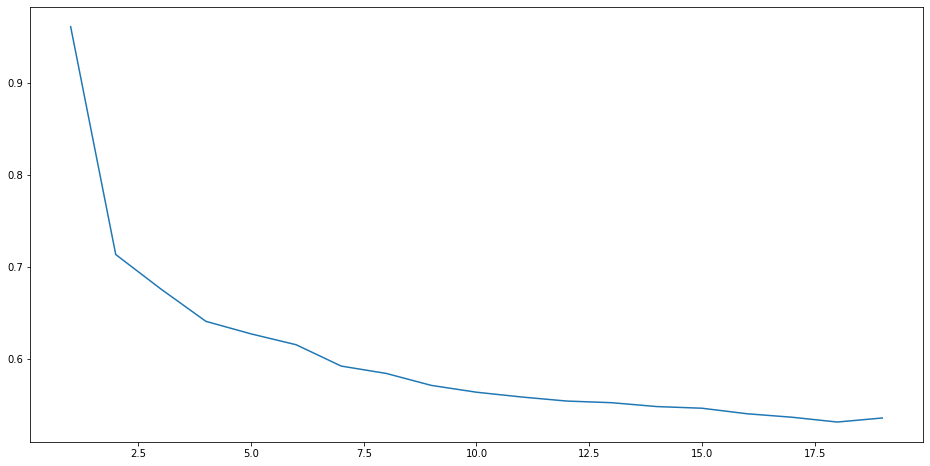

In [25]:
from sklearn.neighbors import KNeighborsClassifier
k=range(1,20)
total_acc=[]
for i in k:
  model_demo=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
  model_demo.fit(x_train,y_train)
  acc=model_demo.score(x_train,y_train)
  total_acc.append(acc)
plt.figure(figsize=(16,8))
plt.plot(k,total_acc)
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2,metric='euclidean')
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [27]:
print(neigh.predict([[2,1,36,1,5,0.0,1,1.0,6]]))

[1]


In [28]:
y_pred=neigh.predict(x_test)

In [29]:
print(y_pred)

[1 1 4 ... 4 2 1]


In [30]:
print(y_test)

288     4
2747    3
7472    4
3115    1
6651    1
       ..
2910    3
1139    3
408     4
7036    4
3877    1
Name: Segmentation, Length: 1667, dtype: int64


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [32]:
accuracy_score(y_pred,y_test)

0.4013197360527894

In [33]:
confusion_matrix(y_pred,y_test)

array([[212, 151,  92, 142],
       [101, 125, 165,  75],
       [ 52,  94, 141,  44],
       [ 36,  17,  29, 191]])

In [34]:
print(precision_score(y_test, y_pred, average=None)) #Calculate metrics for each instance, and find their average 

[0.35510888 0.26824034 0.42598187 0.6996337 ]


In [35]:
print(recall_score(y_test, y_pred, average=None))

[0.5286783  0.32299742 0.33021077 0.42256637]


In [36]:
print(f1_score(y_test, y_pred, average=None))

[0.4248497  0.29308324 0.37203166 0.52689655]


**Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf=RandomForestClassifier(n_estimators=1000,random_state=42)

In [39]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
y_pred=rf.predict(x_test)

In [41]:
y_pred

array([4, 1, 4, ..., 4, 1, 1])

In [42]:
y_test

288     4
2747    3
7472    4
3115    1
6651    1
       ..
2910    3
1139    3
408     4
7036    4
3877    1
Name: Segmentation, Length: 1667, dtype: int64

In [43]:
accuracy_score(y_pred,y_test)

0.489502099580084

In [44]:
confusion_matrix(y_pred,y_test)

array([[178,  98,  46, 100],
       [ 78, 125, 101,  35],
       [ 58, 126, 223,  27],
       [ 87,  38,  57, 290]])

In [45]:
print(precision_score(y_test, y_pred, average=None))

[0.42180095 0.36873156 0.51382488 0.61440678]


In [46]:
print(recall_score(y_test, y_pred, average=None))

[0.44389027 0.32299742 0.52224824 0.64159292]


In [47]:
print(f1_score(y_test, y_pred, average=None))

[0.43256379 0.34435262 0.51800232 0.62770563]


**K-Means**

In [48]:
from sklearn.cluster import KMeans

In [49]:
X=dataset.iloc[:,0:10]
X.shape

(6665, 10)

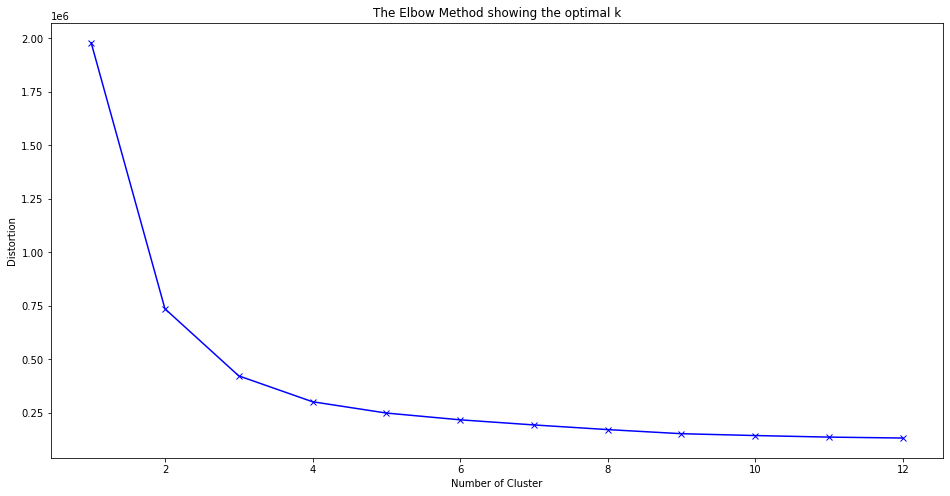

In [50]:
#Elbow Method to find k
distortions = []
K = range(1,13)
for i in K:
    model_demo = KMeans(n_clusters=i,random_state=0)
    model_demo.fit(X)
    distortions.append(model_demo.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Hierarchical Clustering**

In [51]:
X=dataset.iloc[:,0:10].values

In [52]:
X.shape

(6665, 10)

In [53]:
X

array([[ 1.,  2., 22., ...,  4.,  4.,  4.],
       [ 2.,  1., 67., ...,  1.,  6.,  2.],
       [ 1.,  1., 67., ...,  2.,  6.,  2.],
       ...,
       [ 2.,  2., 33., ...,  1.,  6.,  4.],
       [ 2.,  2., 27., ...,  4.,  6.,  2.],
       [ 1.,  1., 37., ...,  3.,  4.,  2.]])

In [54]:
import scipy.cluster.hierarchy as sch

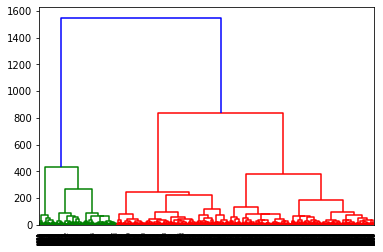

In [55]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))

In [57]:
from sklearn.cluster import AgglomerativeClustering

[2 0 0 ... 2 2 1]


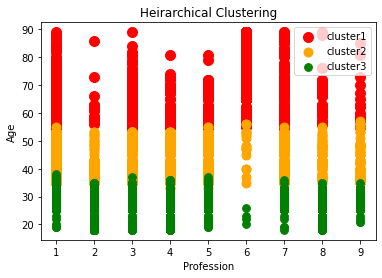

In [83]:
hc =  AgglomerativeClustering(n_clusters=3,linkage='ward')
y_hc = hc.fit_predict(X)
print(y_hc)


#visualize the Cluster
plt.scatter(X[y_hc==0,4],X[y_hc==0,2],s=100,c='red',label='cluster1')
plt.scatter(X[y_hc==1,4],X[y_hc==1,2],s=80,c='orange',label='cluster2')
plt.scatter(X[y_hc==2,4],X[y_hc==2,2],s=60,c='green',label='cluster3')
#plt.scatter(X[y_hc==3,4],X[y_hc==3,2],s=40,c='cyan',label='cluster4')

plt.title('Heirarchical Clustering')
plt.ylabel('Age')
plt.xlabel('Profession')
plt.legend()  
plt.show()

**DBSCAN**

In [90]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

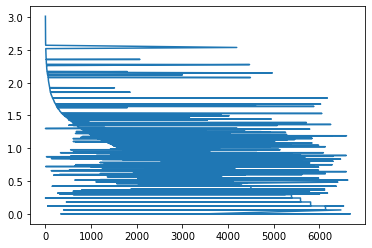

In [89]:
X = StandardScaler().fit_transform(dataset)
ns = 4
nearestNeighbour = NearestNeighbors(ns).fit(X)
distances,indices = nearestNeighbour.kneighbors(X)
distanceDec = sorted(distances[:,3],reverse=True)
plt.plot(indices[:,0],distanceDec)
db = DBSCAN(eps=0.3,min_samples=5).fit(X)
labels = db.labels_  #-1 is noise points
db.core_sample_indices_     #core_datapointa
cores_samples_mask = np.zeros_like(db.labels_,dtype=bool)
cores_samples_mask[db.core_sample_indices_]=True
cores_samples_mask
n_clusters = len(set(labels))-1
unique_lables = set(labels)
colors= [plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_lables))]

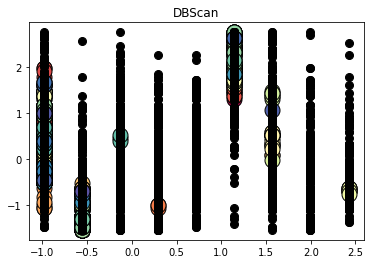

In [93]:

for k,col in zip(unique_lables,colors):
    if(k==-1):
        col=[0,0,0,1]   #noise points
    noise_mask = labels==k

    y = X[cores_samples_mask & noise_mask]
    plt.plot(y[:,4],y[:,2],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=15)    #core datapoints
    
    y = X[~cores_samples_mask & noise_mask]      #boundary datapoints  
    plt.plot(y[:,4],y[:,2],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=8)    #boundary datapoints

plt.title('DBScan')
plt.show()

**Conclusion:**




1. Both the Supervised Learning Algorithm which are KNN and Random Forest is providing similar kind of accuracy on the given dataset. 
2. In KNN we can easily find K but it is slower than Random Forest.
3. The Unsupervised Learning Algorithm are not good enough on this dataset as their are only 2-3 values in all columns.
4. In KMeans we can find K(number of clusters) easily by elbow method.
5. I have used sklearn libraries for this assignment to explore it more. 
6. To Increse Accuracy we can Use Normalization Method 
7. The most of Unsupervised Learning are used to detect outliers. We can remove outliers and then do Superivsed Learning to Increase Accuracy.









